## Classification
### Introduction
In classification, we assign an input vector $\mathbf{x}\in \mathbf{R}^d$ to one of $K$ classes. That is we aim to learn a function 

$f:\mathbf{R}^d\rightarrow [K]$

#### Simple Classifiers

Let us get some intuition for the classification problem by generating some toy data from two classes. These are two widely separated Gaussian blobs.

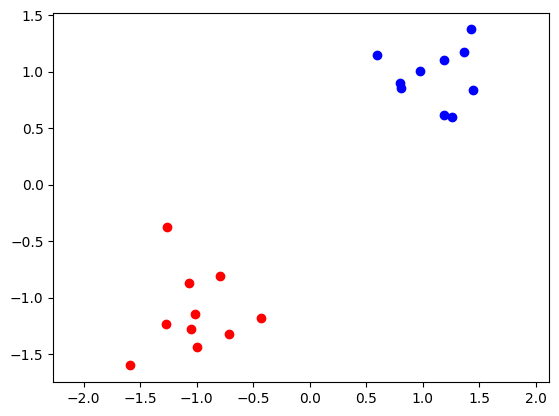

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

num_class = 2
num_per_class = 10
var = .1

means = [[1,1],[-1,-1]]
cov = [[var, 0], [0, var]] 
X = np.array([])
y = []
class_color = ['b','r']

for class_index in range(num_class):
    class_data = np.random.multivariate_normal(means[class_index],
                                               cov, 
                                               num_per_class)
    X = np.vstack([X, class_data]) if X.size else class_data
    y = np.concatenate((y, np.ones(num_per_class) * class_index))
    plt.plot(class_data[:, 0], 
             class_data[:,1], 
             class_color[class_index] + 'o')
    plt.axis('equal')

### Nearest Neighbour Classifier
After training our classifier, we aim to be able to correctly classify new and previously unseen examples. Returning to the previous example, let us generate a random point from one of the two classes

A simple classifier assigns the class of the nearest training point to the test point. This is the nearest neighbour classifier.


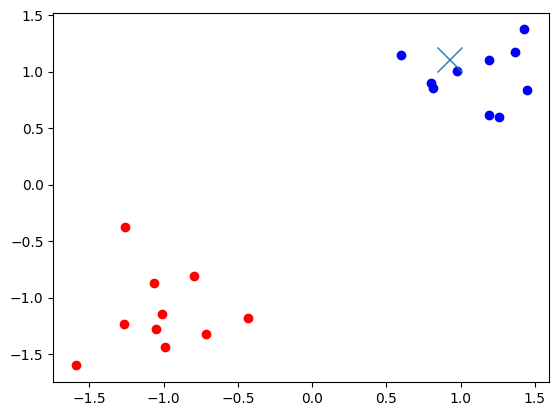

In [2]:
data_class = np.random.binomial(1,.5) # either class 1 or 0
test_data = np.random.multivariate_normal(means[data_class], cov, 1)

plt.plot(X[np.array(y)==0,0], X[np.array(y)==0,1], class_color[0] + 'o')
plt.plot(X[np.array(y)==1,0], X[np.array(y)==1,1], class_color[1] + 'o')
plt.plot(test_data[0,0], test_data[0,1], 'x', markersize=18)

In [3]:
#nearest neighbour classifier
dist = np.sqrt(np.sum((X - test_data)**2, 1))
print('True Test Class: %d Predicted Test Class %d'%(data_class, y[np.argmin(dist)]))

True Test Class: 0 Predicted Test Class 0


### K-nearest neighbour classifier

Instead of using the class of the nearest training point, we can examine the classes of the K nearest neighbours and assign a class to the test point by majority voting.

To determine the best value of K, we examine the classification accuracy on a validation set. In the following, we use the [scikit learn](http://scikit-learn.org/stable/index.html) implementation of a K nearest neighbour classifier.

## Training, validation and test split
* Training set - learn classifier
* Validation set - choose optimal parameter setting
* Test set - assess performance of the system

Best value of K is:1
Accuracy on test data 1.00


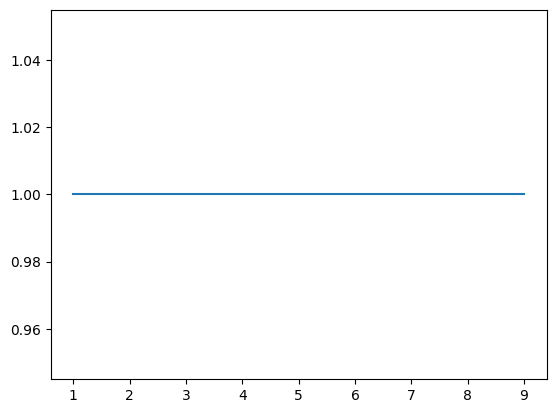

In [4]:
from sklearn.model_selection import train_test_split # to obtain the train, validation and test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3)# 70% for training
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) # 15% validation and 15 % test

neighbours = [1, 3, 5, 7, 9] # number of neighbours to test
accuracy = np.zeros(len(neighbours))

for index in range(len(neighbours)):
    clf = KNeighborsClassifier(n_neighbors=neighbours[index])
    clf.fit(X_train, y_train)
    accuracy[index] = accuracy_score(y_val, clf.predict(X_val))

plt.plot(neighbours, accuracy)

#chose K
K = neighbours[np.argmax(accuracy)]
#Get the performance on test data

clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train)
print('Best value of K is:%d'%K)
print('Accuracy on test data %.2f'%accuracy_score(y_test, clf.predict(X_test)))

### Classifying digits

Let us attempt to build a KNN classifier for digits. We will use one of the datasets already available of scikit learn. The digits are 8-by-8 images stored in an array of length 64.

6


<Figure size 640x480 with 0 Axes>

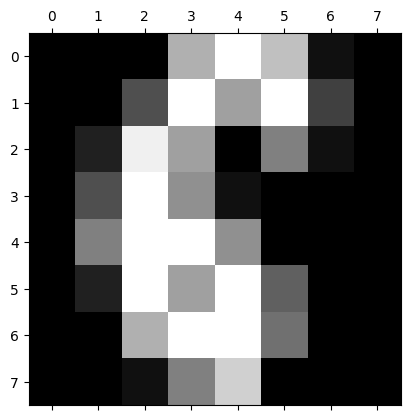

In [5]:
#load the data set and plot some samples
from sklearn.datasets import load_digits


digits = load_digits()
X_digits = digits.data
y_digits = digits.target
plt.gray();

indx = np.random.randint(0, X_digits.shape[0])
plt.matshow(X_digits[indx].reshape(8,8));
print(y_digits[indx])


In [6]:
digits.data.shape

(1797, 64)

Best value of K is:3
Accuracy on test data 0.99


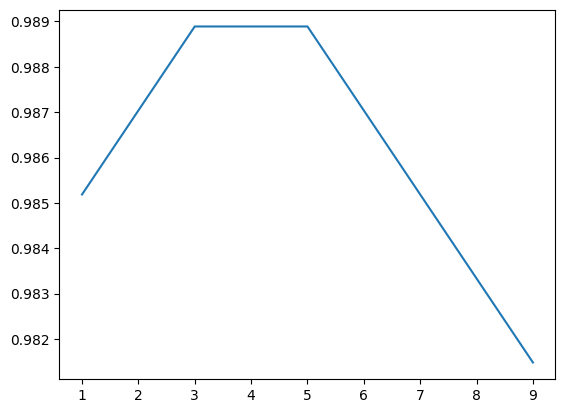

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits,test_size=.3)# 70% for training
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) # 15% validation and 15 % test

neighbours = [1, 3, 5, 7, 9] # number of neighbours to test
accuracy = np.zeros(len(neighbours))

for index in range(len(neighbours)):
    clf = KNeighborsClassifier(n_neighbors=neighbours[index])
    clf.fit(X_train, y_train)
    accuracy[index] = accuracy_score(y_val, clf.predict(X_val))

plt.plot(neighbours, accuracy)

#chose K
K = neighbours[np.argmax(accuracy)]
#Get the performance on test data

clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train)
print('Best value of K is:%d'%K)
print('Accuracy on test data %.2f'%accuracy_score(y_test, clf.predict(X_test)))

# Neural Networks

Neural networks are a powerful machine learning framework used to learn complex input-output mappings from examples. Examples of successful applications of neural networks include:
1. Classification of handwritten digits
2. Speech recognition

Neural networks can be viewed as a series of nonlinear transformations applied to the input variables where the nature of the transformation is learned from the training data. There are several neural network architectures but we will focus on a feedforward architecture where information flows in one direction from input to output and there is no feedback from the output back to the input.

## The Multilayer Perceptron

The multilayer perceptron (MLP) is a feed forward neural network.

The input to a given layer is obtained from the output of the previous layer. The output of a given layer is obtained by applying an activation function to a weighted linear combination of the inputs. Mathematically let $x_1,\ldots,x_D$ be the inputs to a given layer. The output of the $j$th hidden layer is given by
\begin{eqnarray*}
z_j=h(\sum_{i=1}^Dw_{ji}x_i+w_{j0})
\end{eqnarray*}
where:
1. $h(.)$ is a nonlinear activation function
2. $w_{ji}$ is the weight from input node (neuron) $i$ to output node $j$
3. $w_{j0}$ is known as the bias of neuron $j$

Similarly, the output $y_k$ of the $k$th output neuron is obtained by applying an activation function to a weighted linear combination of the inputs from the hidden layer. This output is a function of the weights $\mathbf{w}$ and the inputs $\mathbf{x}$ and we write $y_k(\mathbf{x},\mathbf{w})$. We can collect all the outputs into a vector $\mathbf{y}(\mathbf{x},\mathbf{w})$


### Activation Functions
There are a number of activation functions used depending on the nature of the data and target variables. These include:
1. The sigmoid function 
\begin{eqnarray*}
\sigma(a)=\frac{1}{1+\exp(-a)}
\end{eqnarray*}
2. The Tanh function 
\begin{eqnarray*}
\tanh(a)=\frac{\exp(a)-\exp(-a)}{\exp(a)+\exp(-a)}
\end{eqnarray*}
3. The rectified linear unit (ReLU)
\begin{eqnarray*}
f(a)=max\{o,a\}
\end{eqnarray*}

In [8]:
# train an MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [9]:
clf.score(X_test, y_test)

0.9666666666666667

In [10]:
# Try various architectures
hls = [(50,), (100,), (200,), (300,), (50,50), (100, 100), (200, 200), (300,300)]
accuracy = np.zeros(len(hls))
for index, hl in enumerate(hls):
    clf = MLPClassifier(hidden_layer_sizes=hl, random_state=1, max_iter=300).fit(X_train, y_train)
    clf.fit(X_train, y_train)
    accuracy[index] = accuracy_score(y_val, clf.predict(X_val))
    



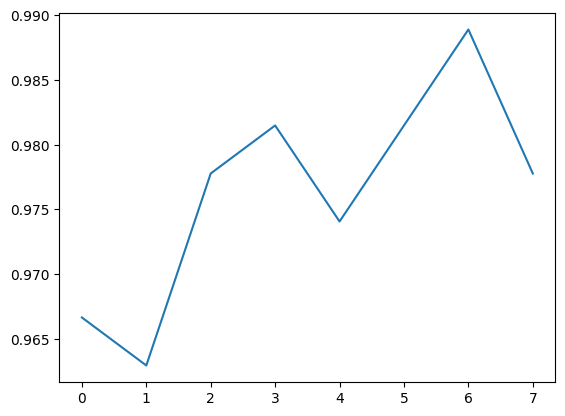

In [11]:
plt.plot(np.arange(len(hls)), accuracy)

In [12]:
hl = hls[np.argmax(accuracy)]
clf = MLPClassifier(hidden_layer_sizes=hl, random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9814814814814815

# Using Neural Networks for Image Classification
We can make use of neural networks trained on large datasets such as the Imagenet dataset which contains 1000 categories.
Pretrained neural networks are available for use.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow_hub as hub

import pandas as pd

2023-11-23 11:25:25.130705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 11:25:25.130729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 11:25:25.130745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 11:25:25.135465: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 11:25:25.736491: W tensorflow/compiler/

## Imagenet Categories

In [14]:
classes = list(pd.read_csv('ImageNetLabels.txt', header=None)[0])
classes

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

## Pretrained Model
We use the EfficientNet neural network that is available for download.

In [15]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2")
])
m.build([None, 224, 224, 3])  # Batch input shape.


2023-11-23 11:25:26.437248: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 11:25:26.440055: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              7200312   
                                                                 
Total params: 7200312 (27.47 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 7200312 (27.47 MB)
_________________________________________________________________


## Classification Example
We use the neural network to classify some images obtained online.

In [17]:
image = tf.keras.utils.load_img('img/dog.jpeg')
input_arr = tf.keras.utils.img_to_array(image) / 255
input_arr = np.array([input_arr]) 

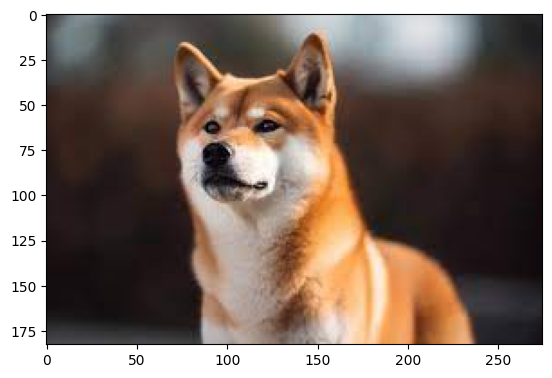

In [18]:
plt.imshow(image)

We compute the most probable class

In [19]:
p = tf.nn.softmax(m.predict(input_arr))

1/1 [==============================] - 1s 770ms/step


In [20]:
p.numpy().max()

0.47974586

In [21]:
classes[p.numpy().argmax()]

'coyote'